In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv("../input/home-data-for-ml-course/train.csv")
train = pd.DataFrame(data)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data = pd.read_csv("../input/home-data-for-ml-course/test.csv")
test = pd.DataFrame(data)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
y = train['SalePrice']
train.drop(["SalePrice", 'Id'], axis = 1, inplace=True)

TestID = test["Id"]
test.drop(["Id"], axis =1, inplace = True)

In [5]:
mv = train.isnull().sum()/len(train)
train = train.drop(columns=mv[mv>0.90].index)
train.shape

(1460, 76)

In [6]:
test = pd.DataFrame(test, columns = train.columns)
test.shape

(1459, 76)

In [7]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,NaN,0,12,2008,WD,Normal


In [8]:
for x in train.columns:
    #printing unique values
    print(x ,':', len(train[x].unique()))

MSSubClass : 15
MSZoning : 5
LotFrontage : 111
LotArea : 1073
Street : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
OverallQual : 10
OverallCond : 9
YearBuilt : 112
YearRemodAdd : 61
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 5
MasVnrArea : 328
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 5
BsmtCond : 5
BsmtExposure : 5
BsmtFinType1 : 7
BsmtFinSF1 : 637
BsmtFinType2 : 7
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 6
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
KitchenQual : 4
TotRmsAbvGrd : 12
Functional : 7
Fireplaces : 4
FireplaceQu : 6
GarageType : 7
GarageYrBlt : 98
GarageFinish : 4
GarageCars : 5
GarageArea : 441
GarageQual : 6
GarageCond : 6
PavedDrive : 3
WoodDeckSF :

In [9]:
num_df = train.select_dtypes(include=np.number)
print(num_df.shape)

# Filtering categorical data
cat_df = train.select_dtypes(exclude=np.number)
print(cat_df.shape)

(1460, 36)
(1460, 40)


In [10]:
# Filtering numerical data
num_df_test = test.select_dtypes(include=np.number)
print(num_df.shape)

# Filtering categorical data
cat_df_test = test.select_dtypes(exclude=np.number)
print(cat_df_test.shape)

(1460, 36)
(1459, 40)


In [11]:
for x in cat_df.columns:
    #printing unique values
    print(x ,':', len(cat_df[x].unique()))

MSZoning : 5
Street : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 5
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 5
BsmtCond : 5
BsmtExposure : 5
BsmtFinType1 : 7
BsmtFinType2 : 7
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 6
KitchenQual : 4
Functional : 7
FireplaceQu : 6
GarageType : 7
GarageFinish : 4
GarageQual : 6
GarageCond : 6
PavedDrive : 3
Fence : 5
SaleType : 9
SaleCondition : 6


In [12]:
# Filling missing values by median for numerical columns 
imp_median = SimpleImputer(missing_values=np.NaN, strategy='mean')
num_df = pd.DataFrame(imp_median.fit_transform(num_df), columns=num_df.columns)
print(num_df.shape)

# Filling missing values by most frequent value for categorical columns
for i in cat_df.columns:
    cat_df[i] = cat_df[i].fillna(cat_df[i].mode()[0])
    
cat_df.isnull().sum()
num_df.isnull().sum()

(1460, 36)


MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [13]:
# Filling missing values by median for numerical columns 
imp_median = SimpleImputer(missing_values=np.NaN, strategy='mean')
num_df_test = pd.DataFrame(imp_median.fit_transform(num_df_test), columns=num_df_test.columns)
print(num_df_test.shape)

# Filling missing values by most frequent value for categorical columns
for i in cat_df_test.columns:
    cat_df_test[i] = cat_df_test[i].fillna(cat_df_test[i].mode()[0])
    
cat_df_test.isnull().sum()
num_df_test.isnull().sum()

(1459, 36)


MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

0.9029070428639221

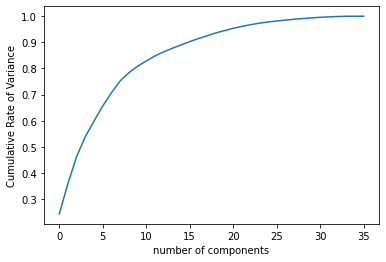

In [14]:
scaled_num = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(num_df), columns = num_df.columns)
#optimuadd_suffixm number of components
pca = PCA().fit(scaled_num)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("Cumulative Rate of Variance")

pca = PCA(n_components = 0.90)

pca_fit = pca.fit_transform(scaled_num)
num_pca = pd.DataFrame(data = pca_fit)
pca.explained_variance_ratio_.sum()


In [15]:
num_pca.shape

(1460, 16)

0.956775981204512

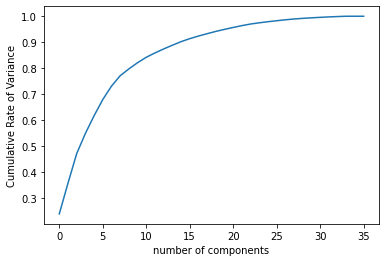

In [16]:
scaled_num_test = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(num_df_test), columns = num_df_test.columns)
pca_test = PCA().fit(scaled_num_test)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("Cumulative Rate of Variance")

#final
pca_test = PCA(n_components = 21)

pca_fit_test = pca_test.fit_transform(scaled_num_test)
num_pca_test = pd.DataFrame(data = pca_fit_test)
pca_test.explained_variance_ratio_.sum()


In [17]:
num_pca.shape

(1460, 16)

In [18]:
cat_df = pd.get_dummies(cat_df)
cat_df.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [19]:
cat_df_test = pd.get_dummies(cat_df_test)
cat_df_test.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [20]:
cat_df.shape

(1460, 243)

In [21]:
y.shape

(1460,)

In [22]:
# Concatinating numerical and categorical data
train = pd.concat([y, num_df, cat_df], axis=1)
train = pd.DataFrame(train)

# Verifying missing values
print(f'Total missing values: {train.isnull().sum().sum()}')
print(train.shape)
train.head()

Total missing values: 0
(1460, 280)


,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,181500,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,223500,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,140000,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,250000,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


In [23]:
# Concatinating numerical and categorical data
test = pd.concat([num_df_test, cat_df_test], axis=1)
test
# Verifying missing values
print(f'Total missing values: {test.isnull().sum().sum()}')
print(test.shape)
test.head()

Total missing values: 0
(1459, 263)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
y = train['SalePrice']
X = train.drop(['SalePrice'], axis = 1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [26]:

space = {
    "n_estimators": hp.choice("n_estimators", [10, 20, 30, 40, 50, 60, 70, 80, 90, 120, 150, 200]),
    "criterion": hp.choice("criterion", ['squared_error', 'absolute_error']),
    "max_depth": hp.choice("max_depth", [2, 4, 6, 8, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]),
    "max_features": hp.choice("max_features", ['auto', 'sqrt', None]),
    "min_samples_leaf": hp.choice ("min_samples_leaf", [1, 2, 3, 4]),
    "min_samples_split": hp.choice("min_samples_split", [2, 4, 6, 8, 10])
}

def hyperparameter_tuning(params):
    rf = ExtraTreesRegressor(**params,n_jobs=-1, verbose = 0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    MAE= metrics.mean_absolute_error(y_test, y_pred)
    return {"loss": -np.min(MAE), "status": STATUS_OK}


trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=50, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 50/50 [02:37<00:00,  3.15s/trial, best loss: -39654.00554287165]
Best: {'criterion': 1, 'max_depth': 0, 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 8}


In [27]:
clf = ExtraTreesRegressor(n_estimators=20,
                          max_depth = 2,
                          criterion = 'squared_error',
                         max_features = 'sqrt',
                          min_samples_leaf = 2,
                          min_samples_split = 4)
clf = clf.fit(X, y)

model = SelectFromModel(clf, prefit=True)
feature_idx = model.get_support()
feature_name = X.columns[feature_idx]

X_new = pd.DataFrame(model.transform(X), columns = feature_name)
X_new.head()

,LotFrontage,OverallQual,MasVnrArea,1stFlrSF,BsmtFullBath,FullBath,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,...,BsmtQual_Ex,BsmtQual_TA,BsmtExposure_Gd,BsmtFinType1_GLQ,HeatingQC_Ex,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_TA,GarageFinish_Fin,GarageFinish_Unf
0,65.0,7.0,196.0,856.0,1.0,2.0,0.0,2003.0,2.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,80.0,6.0,0.0,1262.0,0.0,2.0,1.0,1976.0,2.0,298.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,68.0,7.0,162.0,920.0,1.0,2.0,1.0,2001.0,2.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,60.0,7.0,0.0,961.0,1.0,1.0,1.0,1998.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,84.0,8.0,350.0,1145.0,1.0,2.0,1.0,2000.0,3.0,192.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
X_new_test = pd.DataFrame(test, columns = feature_name)
X_new_test.head()

,LotFrontage,OverallQual,MasVnrArea,1stFlrSF,BsmtFullBath,FullBath,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,...,BsmtQual_Ex,BsmtQual_TA,BsmtExposure_Gd,BsmtFinType1_GLQ,HeatingQC_Ex,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_TA,GarageFinish_Fin,GarageFinish_Unf
0,80.0,5.0,0.0,896.0,0.0,1.0,0.0,1961.0,1.0,140.0,...,0,1,0,0,0,0,0,1,0,1
1,81.0,6.0,108.0,1329.0,0.0,1.0,0.0,1958.0,1.0,393.0,...,0,1,0,0,0,0,0,0,0,1
2,74.0,5.0,0.0,928.0,0.0,2.0,1.0,1997.0,2.0,212.0,...,0,0,0,1,0,0,0,1,1,0
3,78.0,6.0,20.0,926.0,0.0,2.0,1.0,1998.0,2.0,360.0,...,0,1,0,1,1,0,0,0,1,0
4,43.0,8.0,0.0,1280.0,0.0,2.0,0.0,1992.0,2.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
# Concatinating numerical and categorical data
train = pd.concat([X_new, y], axis=1)
train = pd.DataFrame(train)

# Verifying missing values
print(f'Total missing values: {train.isnull().sum().sum()}')
print(train.shape)
train.head()

Total missing values: 0
(1460, 33)


,LotFrontage,OverallQual,MasVnrArea,1stFlrSF,BsmtFullBath,FullBath,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,...,BsmtQual_TA,BsmtExposure_Gd,BsmtFinType1_GLQ,HeatingQC_Ex,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_TA,GarageFinish_Fin,GarageFinish_Unf,SalePrice
0,65.0,7.0,196.0,856.0,1.0,2.0,0.0,2003.0,2.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,208500
1,80.0,6.0,0.0,1262.0,0.0,2.0,1.0,1976.0,2.0,298.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,181500
2,68.0,7.0,162.0,920.0,1.0,2.0,1.0,2001.0,2.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,223500
3,60.0,7.0,0.0,961.0,1.0,1.0,1.0,1998.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,140000
4,84.0,8.0,350.0,1145.0,1.0,2.0,1.0,2000.0,3.0,192.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,250000


In [30]:
y= train['SalePrice']
X = train.drop(['SalePrice'], axis =1)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.mean_absolute_error(y_test, y_pred)

21628.433945857792

In [32]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:

space = {
    "bootstrap": hp.choice("bootstrap", [True, False]),
    "n_estimators": hp.choice("n_estimators", [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 150, 200, 400, 600, 800, 1000]),
    "max_depth": hp.choice("max_depth", [2, 4, 6, 8, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]),
    "criterion": hp.choice("criterion", ['squared_error', 'absolute_error', 'poisson']),
    "max_features": hp.choice("max_features", ['auto', 'sqrt']),
    "min_samples_leaf": hp.choice ("min_samples_leaf", [1, 2, 3, 4]),
    "min_samples_split": hp.choice("min_samples_split", [2, 4, 6, 8, 10])
}

def hyperparameter_tuning(params):
    rf = RandomForestRegressor(**params,n_jobs=-1, verbose = 0)
    rf.fit(X_train, y_train)
    y_scores = rf.predict(X_test)
    MAE= metrics.mean_absolute_error(y_test, y_scores)
    return {"loss": np.min(MAE), "status": STATUS_OK}


trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=200, 
    trials=trials
)

print("Best: {}".format(trials.best_trial))

100%|██████████| 200/200 [05:08<00:00,  1.54s/trial, best loss: 20266.40764840183]
Best: {'bootstrap': 1, 'criterion': 0, 'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 0, 'min_samples_split': 0, 'n_estimators': 9}


In [40]:
print("Best: {}".format(trials.best_trial))

Best: {'state': 2, 'tid': 191, 'spec': None, 'result': {'loss': 20266.40764840183, 'status': 'ok'}, 'misc': {'tid': 191, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'bootstrap': [191], 'criterion': [191], 'max_depth': [191], 'max_features': [191], 'min_samples_leaf': [191], 'min_samples_split': [191], 'n_estimators': [191]}, 'vals': {'bootstrap': [1], 'criterion': [0], 'max_depth': [10], 'max_features': [1], 'min_samples_leaf': [0], 'min_samples_split': [0], 'n_estimators': [9]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2022, 12, 30, 18, 36, 53, 281000), 'refresh_time': datetime.datetime(2022, 12, 30, 18, 36, 53, 630000)}


In [39]:
rf = RandomForestRegressor(bootstrap = best["bootstrap"],
                           criterion = best['criterion'],
                          max_depth = int(best['max_depth']),
                          max_features = int(best['max_features']),
                          min_samples_leaf = int(best['min_samples_leaf']),
                          min_samples_split = int(best['min_samples_split']),
                          n_estimators = int(best['n_estimators']))

rf.fit(X_train, y_train)
y_scores = rf.predict(X_test)
MAE= metrics.mean_absolute_error(y_test, y_scores)
print(MAE)

ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

In [ ]:
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.mean_absolute_error(y_test, y_pred)

In [ ]:
TestID.shape

In [ ]:
y_pred = clf.predict(X_new_test)

result = pd.DataFrame(y_pred, columns = ['SalePrice'])

#TID = pd.DataFrame(TestID)
sub = pd.concat([TestID, result], axis =1)
sub.head()

In [ ]:
sub.to_csv("sub.csv", index=False)

In [ ]:
sub.shape

In [ ]:
sub.head()